# Proyek Analisis Data: Nama dataset
- Nama: Daniel Alexandro Dwitama
- Email: danielalexsihombing@gmail.com
- Id Dicoding: ddanielalexx

## Menentukan Pertanyaan Bisnis

- Bagaimana performa bike sharing dari tahun 2011 - 2012?
- Apakah ada pengaruh antara temp/ temperatur, atemp/ feeling temp, hum/ kelembaban, dan windspeed/ kecepatan angin terhadap jumlah penggunaan bike sharing?

## Menyiapkan semua library yang dibuthkan

In [ ]:
#memanggil semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1ws7r368NYfzKNS9OvfUhUyt91SRtJBi8uld-PgwynR8/edit#gid=36806602'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
bikesharing_df = pd.read_csv(sheet_url_trf)
bikesharing_df

https://docs.google.com/spreadsheets/d/1ws7r368NYfzKNS9OvfUhUyt91SRtJBi8uld-PgwynR8/export?format=csv&gid=36806602


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

In [ ]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Overview:
1. Tidak ada nullvalues
2. Convert data type column **dteday** dari object menjadi datetime
3. Convert data type column **season** dari int menjadi string karena season merupakan category dimana 1: spring, 2: summer, 3: fall, 4: winter
4.Convert data type column **yr** into string/category where 0: 2011, 1:2012
5. Convert data type column **mnth** into string where it show number of month
6. convert **holiday** from int into string/ category where 0: not holiday, 1:holiday
7. Convert **weekday** from int into string since it show day of the week
8. Convert **workingday** from int to string where weekend/holiday : 1, working day: 0.
9. Convert data type column **weathersit** dari int menjadi string, karena weathersit/ weather situation merupakan categori, dimana
1 =  Cerah, sedikit awan, berawan sebagian
2 = kabut + berawan, kabut + sedikit awan, kabut
3 = salju ringan, hujan ringan + badai petir + awan tersebar, hujan ringan + awan tersebar
4 = hujan lebat + palet es + badai petir + kabut, salju + kabut
10. Additional Information:
  - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
  - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
  - hum: Normalized humidity. The values are divided to 100 (max)
  - windspeed: Normalized wind speed. The values are divided to 67 (max)
  - casual: count of casual users
  - registered: count of registered users
  - cnt: count of total rental bikes including both casual and registered

In [ ]:
print("Jumlah duplikasi: ", bikesharing_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Overview:
1. Tidak ada duplication
2. Tidak ada keanehan pada bikesharing_df

### Cleaning Data

In [ ]:
#Mengganti tipe data int into str
category_columns = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

for column in category_columns:
  bikesharing_df[column] = bikesharing_df[column].astype(str)

In [ ]:
#mengganti tipe data objt into datetime
bikesharing_df['dteday'] = pd.to_datetime(bikesharing_df['dteday'])

In [ ]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore bikesharing_Df

In [ ]:
bikesharing_df.describe(include="all")

<ipython-input-65-471a95750d1e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikesharing_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3,1,1,0,6,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Overview:
1. Data ini mencatat terdapat data dalam 731 hari dari tahun 2011 sampai 2012.
2. Rata2 temp: 0.49*41= 20.31 C. Max temp: 0.861667*41 = 35,32 C
3. Rata2 atemp: 0.861667*50 = 43,08 C. Max atemp: 0.840896*50 = 42,04 C
4. Rata2 hum: 0.627894*100 = 62,78. Max hum 0.972500*100 = 97,25.
5. Rata2 windspeed: 0.190486*67 = 12,76. Max windspeed: 0.507463*67 = 34,00
6. Secara keseluruhan rata2 penggunaan bike sharing per harinya ada 4505 orang dan maksimal per harinya bisa mencapai 8714 orang
7. Berdasarkan registered user/membership rata2 menggunakan 3657 orang per hari, dan maksimal per harinya bisa mencapai 6946 org.
8. Berdasarkan casual user rata2 pengguna bikesharing 849 org per hari nya dan pengguna casual maks 3410 org per harinya.

In [ ]:
bikesharing_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["max","min","mean","std"],
    "registered": ["max","min","mean","std"],
    "cnt": ["max","min","mean","std"]
})

instant casual                               registered       \
       nunique    max  min         mean         std        max  min   
season                                                                
1          181   3155    9   334.928177  387.655561       5315  416   
2          184   3410  120  1106.097826  737.590829       6456  674   
3          188   3160  118  1202.611702  595.975032       6917  889   
4          178   3031    2   729.112360  606.318118       6946   20   

                                   cnt                                  
               mean          std   max   min         mean          std  
season                                                                  
1       2269.204420  1200.269751  7836   431  2604.132597  1399.942119  
2       3886.233696  1353.375628  8362   795  4992.331522  1695.977235  
3       4441.691489  1304.626949  8714  1115  5644.303191  1459.800381  
4       3999.050562  1444.782557  8555    22  4728.162921  1699.615261

Insights:
1. Rata2 terbesar casual user bike sharing pada musim gugur/fall dimana rata2 user per harinya 1203 org sedangkan paling sedikit di musim spring dengan rata2 335 org
2. registered user paling banyak menggunakan sharing bike pada saat musim gugur dimana 4442 org per hari sedangkan paling sedikit 2270 org perhari.
3. secara keseluruhan, user bike sharing paling banyak menggunakan di musim gugur dengan 4645 org per hari sedangkan paling sedikit di musim semi/spring 2605 org per hari.
4. Conclusion : Musim gugur merupakan musim yang paling cocok untuk menggunakan bike sharing

In [ ]:
bikesharing_df.groupby(by="season").agg({
    "instant": "nunique",
    "temp": ["max","min","mean","std"],
    "cnt": ["max","min","mean","std"]
})

instant      temp                                 cnt        \
       nunique       max       min      mean       std   max   min   
season                                                               
1          181  0.572500  0.059130  0.297748  0.102735  7836   431   
2          184  0.808333  0.253043  0.544405  0.122650  8362   795   
3          188  0.861667  0.469167  0.706309  0.070848  8714  1115   
4          178  0.657500  0.220833  0.422906  0.107834  8555    22   

                                  
               mean          std  
season                            
1       2604.132597  1399.942119  
2       4992.331522  1695.977235  
3       5644.303191  1459.800381  
4       4728.162921  1699.615261

Hipotesa: apakah suhu di spring lebih dingin dibandingkan musim salju sehingga menyebabkan sedikit org menggunakan bike sharing pada saat tersebut?

Jawaban:
Terlihat bahwa rata2 temp season 1 / spring (0.297748*41 = 12,20 C) lebih rendah dibandingkan rata2 temp season 4 / winter (0.422906*41 = 17,33 C). Sehingga diperkirakan dapat mempengaruhi jumlah user bikesharing. Selanjutnya kita akan cek correlation nya.

<Axes: >

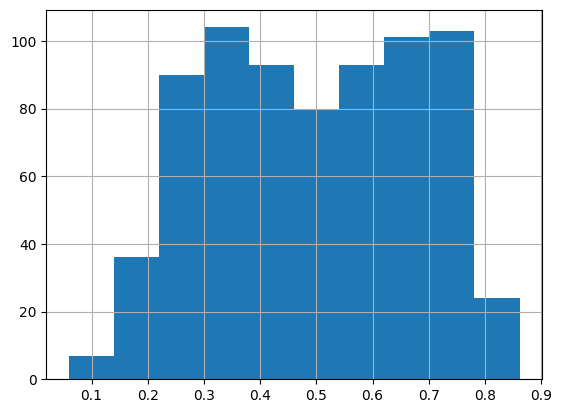

In [ ]:
bikesharing_df.temp.hist()

<Axes: >

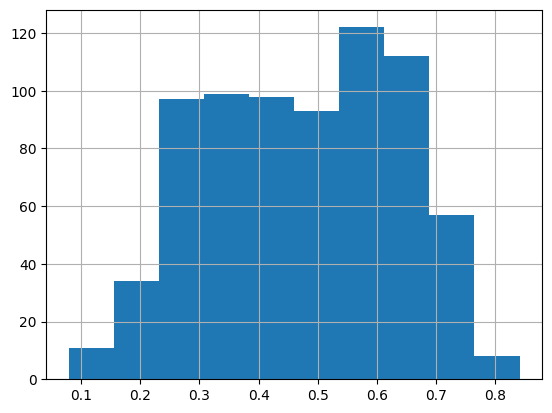

In [ ]:
bikesharing_df.atemp.hist()

<Axes: >

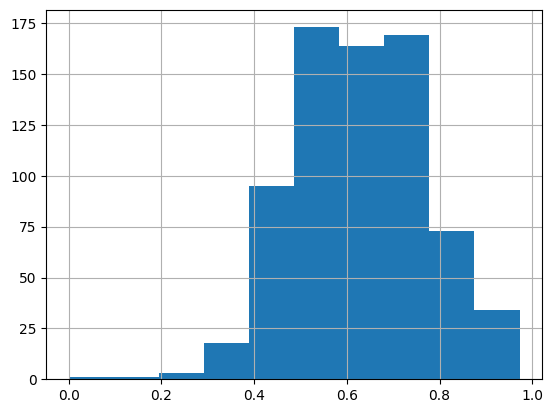

In [ ]:
bikesharing_df.hum.hist()

<Axes: >

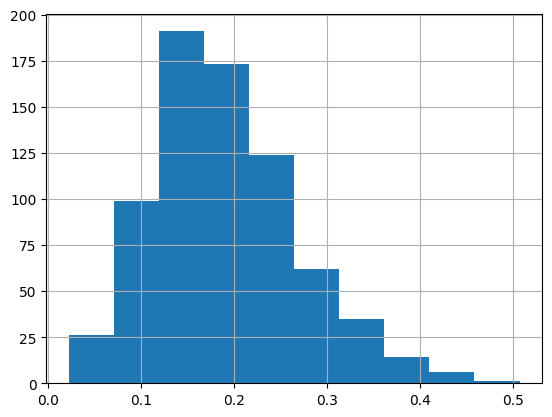

In [ ]:
bikesharing_df.windspeed.hist()

<Axes: >

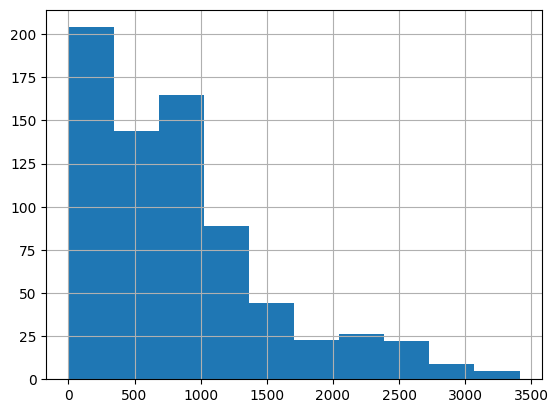

In [ ]:
bikesharing_df.casual.hist()

<Axes: >

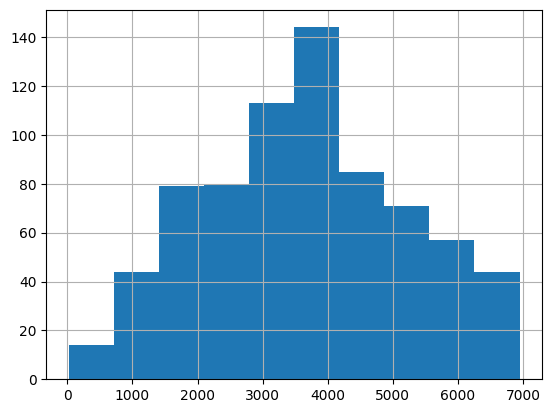

In [ ]:
bikesharing_df.registered.hist()

<Axes: >

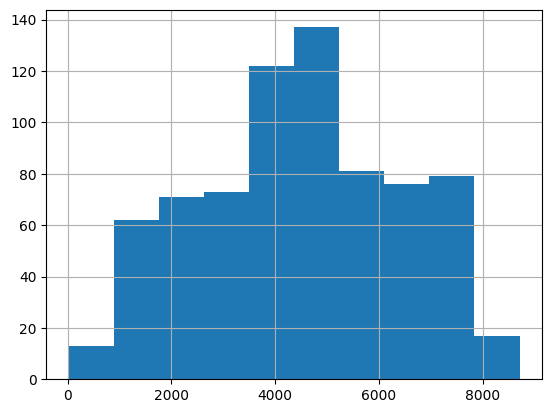

In [ ]:
bikesharing_df.cnt.hist()

Overview:
1. Data yang bersifat mendekati **normal adalah temp, atemp, registered dan cnt**
2. Data yang bersifat** right skewed distribution adalah windspeed & casual** dimana memiliki nilai mean/rata2 yang lebih besar dari median.
3. Data yang bersifat **left skwewd distribution adalah hum** dimana memiliki nilai median yg lebih besar dari rata2.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

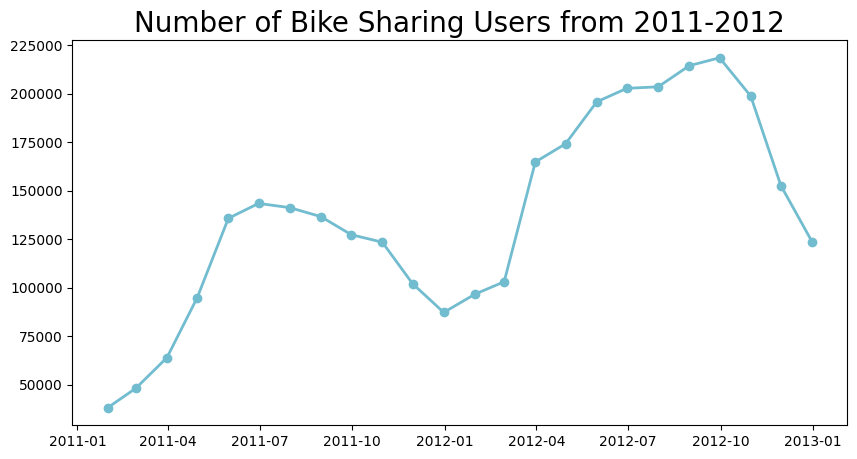

In [ ]:
monthly_bikesharing_df = bikesharing_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})

monthly_bikesharing_df = monthly_bikesharing_df.reset_index()
monthly_bikesharing_df.rename(columns={
    "cnt": "total_user"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_bikesharing_df["dteday"], monthly_bikesharing_df["total_user"], marker='o', linewidth=2, color="#72BCD0")
plt.title("Number of Bike Sharing Users from 2011-2012", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
monthly_bikesharing_df.tail()

,dteday,instant,total_user
19,2012-08-31,31,214503
20,2012-09-30,30,218573
21,2012-10-31,31,198841
22,2012-11-30,30,152664
23,2012-12-31,31,123713


Insights:
1. Overall, terjadi peningkatan pengguna bike sharing dari tahun 2011-2012 per desember 2012 mencapai 125000 ribu pengguna.
2. Sempat terjadi penurunan jumlah pengguna di 2nd half 2011, dan bangkit lagi di awal tahun 2012.

In [ ]:
weathersit_bikesharing_df = bikesharing_df.groupby(by="weathersit").agg({
                                "instant": "nunique",
                                "cnt": "sum"
                            })

weathersit_bikesharing_df = weathersit_bikesharing_df.reset_index()
weathersit_bikesharing_df.rename(columns={
    "instant": "Number of Days",
    "cnt": "Total Users"
}, inplace=True)

weathersit_bikesharing_df.head()

,weathersit,Number of Days,Total Users
0,1,463,2257952
1,2,247,996858
2,3,21,37869


<ipython-input-78-fd2c7e683892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


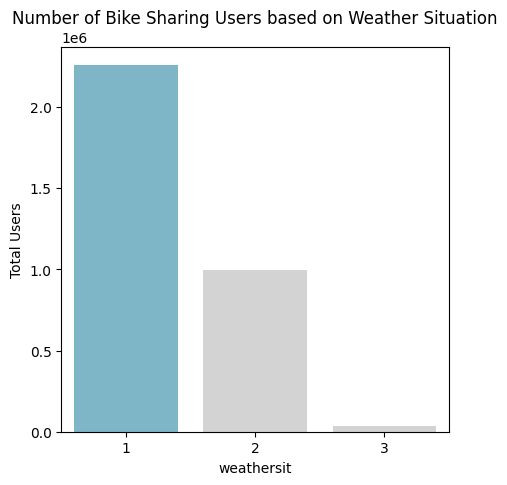

In [ ]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(5, 5))
sns.barplot(
    x="weathersit",
    y="Total Users",
    data=weathersit_bikesharing_df,
    estimator=sum,
    ci=None,
    palette=colors
);
plt.title('Number of Bike Sharing Users based on Weather Situation')
plt.show()

Insights:
1. Data ini menunjukkan bahwa pengguna banyak menggunakan bike sharing pada saat cuaca cerah (weathersit:1). Dimana mencapai 2,25 Juta pengguna dalam 2 tahun terakhir (2011-2012)

### Pertanyaan 2:

In [ ]:
bikesharing_df.corr()

<ipython-input-79-0edb16760fa7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bikesharing_df.corr()


,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
temp,0.150580,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.628830,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


Overview:
1. Kelembapan dan kecepatan angin memiliki hubungan yang kecil & negatif dengan jumlah pengguna bike sharing. (hum:-0.1 & windspeed:-0.23)
2. Temperatur (temp: 0.62 & atemp:0.63) memiliki hubungan yang kuat & positif dengan jumlah pengguna bike sharing.

## Conclusion

- Kesimpulan pertanyaan 1:
  Performa bike sharing dari tahun 2011-2012 terlihat membaik, dimana terdapat peningkatan jumlah pengguna dari 38 rban pengguna menjadi 123 rb di akhir tahun 2012.

  Dilihat lebih jauh, berdasarkan season, pengguna bike sharing paling sedikit terjadi di musim semi dimana rata2 pengguna mencapai 2600an org per hari, dimana suhu rata2 pada saat spring atau musim semi (12 C) lebih rendah dari musim2 lainnya (cth: rata2 suhu winter 17 C).

  Lalu berdasarkan weather situation, pengguna bike sharing lebih banyak menggunakan sepeda pada saat cuaca cerah (weathersit:1) dimana terdapat lebih 2,25 juta pengguna bike sharing dari tahun 2011 - 2012.
  
  Saya beranggapan bahwa cuaca berhubungan dengan naik turunnya pengguna bike sharing dan akan melakukan uji korelasi untuk membuktikan hal tersebut.

- Kesimpulan pertanyaan 2:
  Berdasarkan uji korelasi, didapat temperatur (temp: 0.62 & atemp:0,63) memiliki hubungan positif yang kuat terhadap jumlah pengguna bike sharing.
  
  Sehingga saya berkesimpulan bahwa suhu/temperatur berhubungan dengan jumlah pengguna bike sharing dan dapat menggunakan informasi ini untuk mengoptimalkan operasional dari bike sharing.

  Terima kasih!

## Advanced Analysis

Menerapkan teknik analisis lanjutan seperti RFM analysis, geoanalysis, clustering, dll. (Tanpa menggunakan algoritma machine learning). Saya akan mencoba melakukan **clustering** tanpa menggunakan machine learning. Dengan keterbatasan data pada bikesharing dataset ini, saya akan melakukan clustering menggunakan data temp, hum & windspeed.

Berdasarkan hasil korelasi sebelumnya, Saya berasumsi bahwa semakin tinggi suhu, semakin rendah kelembapan dan semakin rendah kecepatan angin maka hari tersebut merupakan hari yang baik untuk bersepeda. Jadi hasil dari clustering ini diharapkan dapat menentukan apa hari tersebut merupakan hari baik untuk bersepeda atau tidak.


In [ ]:
#Membuat ranking untuk mengurutkan karakter
bikesharing_df['t_rank'] = bikesharing_df['temp'].rank(ascending=False)
bikesharing_df['h_rank'] = bikesharing_df['hum'].rank(ascending=True)
bikesharing_df['w_rank'] = bikesharing_df['windspeed'].rank(ascending=True)

bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,t_rank,h_rank,w_rank
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,536.0,643.5,283.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,514.0,491.0,586.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,702.0,61.0,585.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,698.0,308.0,282.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,680.0,59.0,389.0


In [ ]:
# normalizing the rank of the customers
bikesharing_df['t_rank_norm'] = (bikesharing_df['t_rank']/bikesharing_df['t_rank'].max())*100
bikesharing_df['h_rank_norm'] = (bikesharing_df['h_rank']/bikesharing_df['h_rank'].max())*100
bikesharing_df['w_rank_norm'] = (bikesharing_df['w_rank']/bikesharing_df['w_rank'].max())*100

bikesharing_df.drop(columns=['t_rank', 'h_rank', 'w_rank'], inplace=True)

bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,t_rank_norm,h_rank_norm,w_rank_norm
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,73.324213,88.030096,38.714090
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,70.314637,67.168263,80.164159
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,96.032832,8.344733,80.027360
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,95.485636,42.134063,38.577291
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,93.023256,8.071135,53.214774


In [ ]:
#saya menitikberatkan pada temperatur lalu variabel lainnya, temp 0.6, hum & windspeed 0.2
bikesharing_df['day_score'] = 0.6*bikesharing_df['t_rank_norm']+0.2 * \
    bikesharing_df['h_rank_norm']+0.2*bikesharing_df['w_rank_norm']
bikesharing_df['day_score'] *= 0.05
bikesharing_df = bikesharing_df.round(2)
bikesharing_df[['dteday', 'day_score']].head(7)

,dteday,day_score
0,2011-01-01,3.47
1,2011-01-02,3.58
2,2011-01-03,3.76
3,2011-01-04,3.67
4,2011-01-05,3.40
5,2011-01-06,3.18
6,2011-01-07,3.51


Clustering berdasarkan **day_score** dimana dibawah 3 merupakan hari yang baik untuk bersepeda, 3-4 normal day dan lebih dari 4 merupakan hari yang buruk untuk bersepeda

In [ ]:
bikesharing_df["day_clustering"] = np.where(
    bikesharing_df['day_score'] > 4.2, "Bad day", ( np.where(
                bikesharing_df['day_score'] > 3.5, 'Normal day', 'Good day')))

bikesharing_df[['instant', 'day_score', 'day_clustering']].head(20)

,instant,day_score,day_clustering
0,1,3.47,Good day
1,2,3.58,Normal day
2,3,3.76,Normal day
3,4,3.67,Normal day
4,5,3.40,Good day
5,6,3.18,Good day
6,7,3.51,Normal day
7,8,4.07,Normal day
8,9,4.02,Normal day
9,10,3.82,Normal day


In [ ]:
day_clustering_df = bikesharing_df.groupby(by="day_clustering", as_index=False).dteday.nunique()
day_clustering_df

,day_clustering,dteday
0,Bad day,11
1,Good day,610
2,Normal day,110


In [ ]:
day_clustering_df['day_clustering'] = pd.Categorical(day_clustering_df['day_clustering'], [
    "Good day", "Normal day", "Bad day"
])

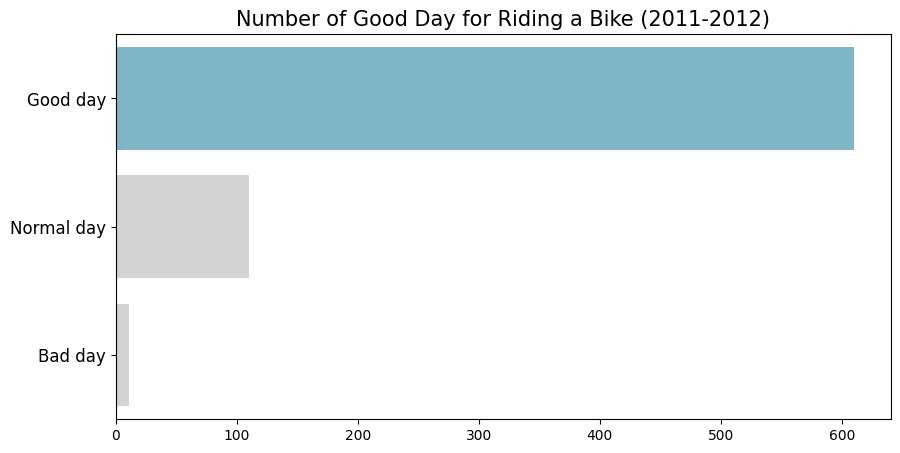

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="dteday",
    y="day_clustering",
    data=day_clustering_df.sort_values(by="day_clustering", ascending=False),
    palette=colors_
)
plt.title("Number of Good Day for Riding a Bike (2011-2012)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

##Simpan File

In [ ]:
#bikesharing_df.to_csv("proyekanalisisbikesharing.csv", index=False)